<a href="https://colab.research.google.com/github/IM07813/tfbasics/blob/main/Regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#regression model
1. linear regression 
 1. it makes the relation between independent and dependent variables through a line of best fit
2. non-linear regression models:
   1. they do exist, but are far more complex

   input or independent variables are features, 

   output or dependent variables are labels





In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-8., -6., -2., 1. , 2, 5., 8., 11.])
Y = X + 10

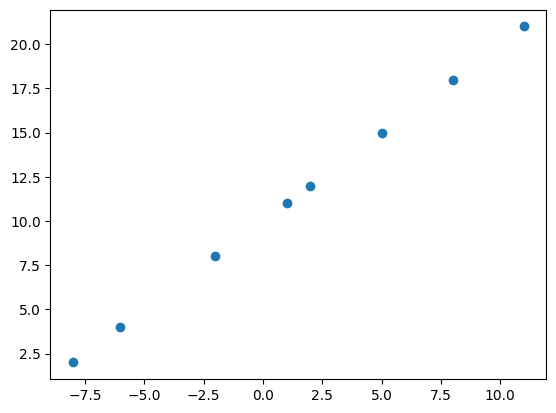

In [2]:
plt.scatter(X,Y);

In [3]:
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([564333])
house_info , house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([564333], dtype=int32)>)

In [4]:
X = tf.cast(tf.constant(X),dtype = tf.float32)
Y = tf.cast(tf.constant(Y), dtype = tf.float32)

In [5]:
print(X)
print(Y)
X[0].shape

tf.Tensor([-8. -6. -2.  1.  2.  5.  8. 11.], shape=(8,), dtype=float32)
tf.Tensor([ 2.  4.  8. 11. 12. 15. 18. 21.], shape=(8,), dtype=float32)


TensorShape([])

In [6]:
Y.shape
from tensorflow import keras
import tensorflow as tf



1. getting data ready

2. creating a model- define the input and output layers, as well as the hidden layers of a DLM.
3. Compiling a model - define the loss function that tells the function how wrong it is and the optimizer which tells the model how to improve the patterns that it's learning and evaluation matrix is what we can use to interpret the performance of our model. 
4. fitting a model - letting model try to find patterns between X and Y. 

#.Sequential means that go layer after layer in a sequence manner



In [35]:

tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = None),
    tf.keras.layers.Dense(100, activation = None),
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['mae'])


In [36]:
model_1.fit(tf.expand_dims(X, axis = -1), Y, epochs = 100)

Epoch 1/100
3/3 [==============================] - 1s 7ms/step - loss: 91.7471 - mae: 91.7471
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 43.6501 - mae: 43.6501
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 11.5201 - mae: 11.5201
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 27.6538 - mae: 27.6538
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 20.9496 - mae: 20.9496
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 10.6815 - mae: 10.6815
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 14.2020 - mae: 14.2020
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 11.2766 - mae: 11.2766
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 10.3413 - mae: 10.3413
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 11.4789 - mae: 11.4789
Epoch 11/100
3/3 [==============================] - 0s 4ms/

#time for predictions



In [37]:
X,Y


(<tf.Tensor: shape=(80,), dtype=int32, numpy=
 array([-200, -195, -190, -185, -180, -175, -170, -165, -160, -155, -150,
        -145, -140, -135, -130, -125, -120, -115, -110, -105, -100,  -95,
         -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,  -45,  -40,
         -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,   10,   15,
          20,   25,   30,   35,   40,   45,   50,   55,   60,   65,   70,
          75,   80,   85,   90,   95,  100,  105,  110,  115,  120,  125,
         130,  135,  140,  145,  150,  155,  160,  165,  170,  175,  180,
         185,  190,  195], dtype=int32)>,
 <tf.Tensor: shape=(80,), dtype=int32, numpy=
 array([-190, -185, -180, -175, -170, -165, -160, -155, -150, -145, -140,
        -135, -130, -125, -120, -115, -110, -105, -100,  -95,  -90,  -85,
         -80,  -75,  -70,  -65,  -60,  -55,  -50,  -45,  -40,  -35,  -30,
         -25,  -20,  -15,  -10,   -5,    0,    5,   10,   15,   20,   25,
          30,   35,   40,   45,   50,   55,   60,   

In [38]:
model_1.predict([2]) #still bad prediction

1/1 [==============================] - 0s 71ms/step


array([[12.020351]], dtype=float32)

In [39]:
y_pred_1= model_1.predict(X)
mse_1 = tf.metrics.mean_squared_error (y_true = Y,
                                    y_pred = tf.squeeze(y_pred_1))
mae_1 = tf.metrics.mean_absolute_error(y_true = Y,
                                       y_pred = tf.squeeze(y_pred_1))

3/3 [==============================] - 0s 3ms/step


#improving the model
1. increase hidden layers or alter hidden neurons by increasing them
2. use a different activation and optimizers in compiling step and change the learning rate
3. change the epochs to a large number 
4. make your dataset large 


In [40]:
#make a bigger dataset
X = tf.range(-200, 200, 5)

In [41]:
Y= X+10
len(X), len(Y)

(80, 80)

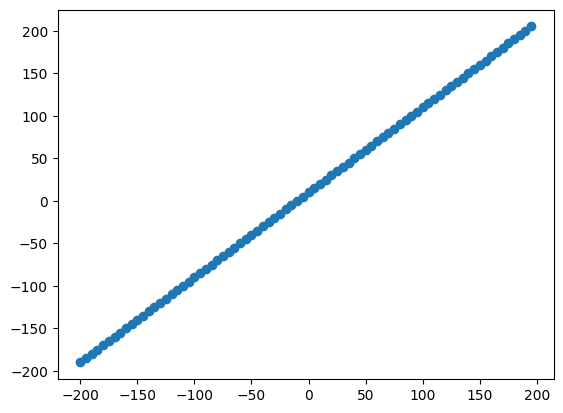

In [42]:
plt.scatter(X,Y)

In [43]:
X_train = X[:60]
Y_train = Y[:60]

X_test = X[60:]
Y_test = Y[60:]

In [44]:
len(X_train), len(Y_train), len(X_test), len(Y_test)

(60, 60, 20, 20)

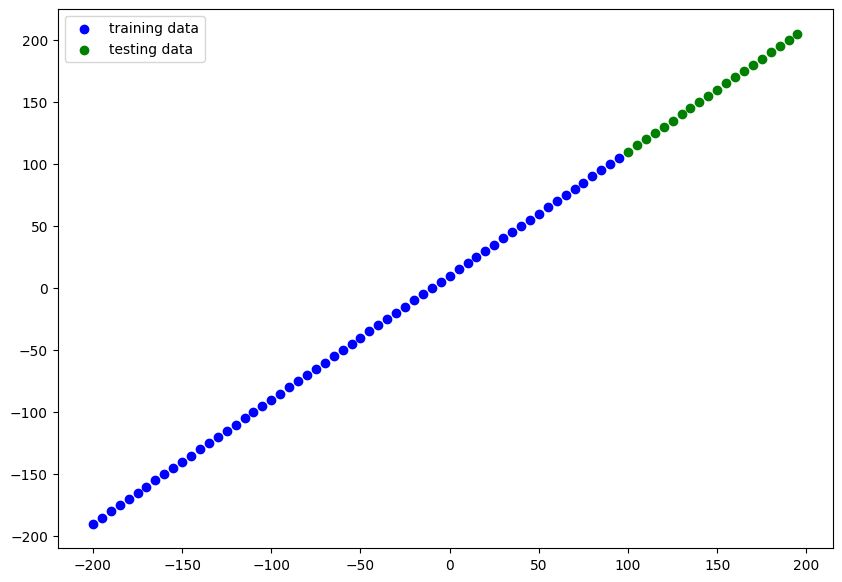

In [45]:
plt.figure(figsize =(10,7))
plt.scatter(X_train, Y_train, c = 'b', label = 'training data')
plt.scatter(X_test, Y_test, c = 'g', label = 'testing data')
plt.legend();

In [46]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = None),
    tf.keras.layers.Dense(100, activation = None),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ['mae'])

In [47]:
model_2.fit(tf.expand_dims(X_train, axis = -1), Y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 20ms/step - loss: 122.3423 - mae: 122.3423
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 93.6408 - mae: 93.6408
Epoch 3/100
2/2 [==============================] - 0s 15ms/step - loss: 67.4786 - mae: 67.4786
Epoch 4/100
2/2 [==============================] - 0s 15ms/step - loss: 40.5784 - mae: 40.5784
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 13.4190 - mae: 13.4190
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 18.5007 - mae: 18.5007
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 30.4920 - mae: 30.4920
Epoch 8/100
2/2 [==============================] - 0s 15ms/step - loss: 32.6637 - mae: 32.6637
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 27.5345 - mae: 27.5345
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 18.5139 - mae: 18.5139
Epoch 11/100
2/2 [==============================] - 

In [48]:
y_pred= model_2.predict(X_test)
y_pred.shape

1/1 [==============================] - 0s 54ms/step


(20, 1)

#plot function:


In [49]:
def plot_predict(train_data = X_train, 
                 train_labels = Y_train,
                 test_data = X_test,
                 test_labels=Y_test,
                 predictions= y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c = 'b', label= 'train_data')
  plt.scatter(test_data, test_labels, c='g', label= 'testing data')
  plt.scatter(test_data, predictions, c = 'r', label = 'predictions')
  plt.legend();

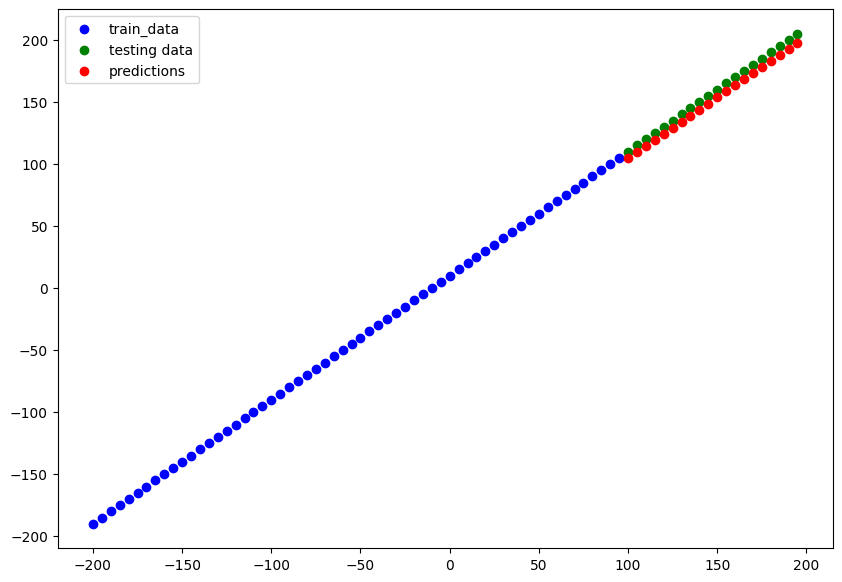

In [50]:
plot_predict()

#evaluating model:
1. MAE: mean-absolute error, it tells us, how far off are our model's predictions
2. MSE: mean-squared-error, it tells us, how far off are our model's predictions after squaring the averages 

In [51]:
model_2.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 105ms/step - loss: 6.3202 - mae: 6.3202


[6.320178985595703, 6.320178985595703]

In [52]:
#calculate the mean-absolute-error
#good for any regression problem
mae_2 = tf.metrics.mean_absolute_error(y_true = Y_test,
                                     y_pred = tf.squeeze(y_pred))
mae_2

<tf.Tensor: shape=(), dtype=float32, numpy=6.3201747>

In [53]:
#calculate the mean-square-error
#when larger errors are more significant than smaller errors
mse_2 = tf.metrics.mean_squared_error (y_true = Y_test,
                                    y_pred = tf.squeeze(y_pred))
mse_2

<tf.Tensor: shape=(), dtype=float32, numpy=40.18221>

In [54]:
import pandas as pd
model_results = [["model-1", mae_1.numpy(), mse_1.numpy()],
                 ["model-2", mae_2.numpy(), mse_2.numpy()]]
all_results = pd.DataFrame(model_results, columns =['model-1', 'mae', 'mse'])
all_results

,model-1,mae,mse
0,model-1,0.686887,0.629099
1,model-2,6.320175,40.182209


##we can see that model_1 is doing better than model_2

##saving a model
1. The SavedModel format
2. The HDF5 format

In [55]:
#using the savedmodel format
model_1.save("best_model_savedmodelformat")

In [56]:
#using the hdf5 format
model_1.save("best_model_HDF5_format.h5")

##load the saved model

In [57]:
#load in the savedmodel format
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_savedmodelformat")
loaded_SavedModel_format.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [58]:
#checking to see if saved model and our "model_1" is giving the same results or not.
model_1_preds = model_1.predict(X)

3/3 [==============================] - 0s 3ms/step


In [60]:
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X)

3/3 [==============================] - 0s 3ms/step


In [62]:
model_1_preds == loaded_SavedModel_format_preds # tells us that all this is equal 

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [63]:
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


#lets check if predictions match with h5

In [64]:
loaded_h5_model_preds = loaded_h5_model.predict(X)

3/3 [==============================] - 0s 6ms/step


In [66]:
loaded_h5_model_preds == model_1_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [